In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_paths = [
    "/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "/content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "/content/Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "/content/Monday-WorkingHours.pcap_ISCX.csv",
    "/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "/content/Tuesday-WorkingHours.pcap_ISCX.csv",
    "/content/Wednesday-workingHours.pcap_ISCX.csv"
]

data_frames = [pd.read_csv(file) for file in file_paths]

In [3]:
print('Data dimensions: ')
for i, data in enumerate(data_frames, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 123774 rows, 79 columns
Data2 -> 259787 rows, 79 columns
Data3 -> 191033 rows, 79 columns
Data4 -> 449170 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 445909 rows, 79 columns
Data8 -> 439439 rows, 79 columns


In [4]:
data = pd.concat(data_frames)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2368080
Number of columns: 79
Total cells: 187078320


In [5]:
# Deleting dataframes after concating to save memory
for d in data_frames: del d

In [6]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [7]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
## Types of dtypes present in the dataframe
set(list(data.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [9]:
## to identify which columns has the "Object" data
categorical_columns=[col for col in data.columns if data[col].dtype=="O"]
categorical_columns

['Label']

In [10]:
## Categorical Data
df_Categorical=data[categorical_columns]
df_Categorical

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
439434,BENIGN
439435,BENIGN
439436,BENIGN
439437,BENIGN


In [11]:
# Numerical data
df_Numerical=data.copy()

In [12]:
df_Numerical.drop(["Label"],axis=1,inplace=True)

df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,1.0,20.0,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,0.0,20.0,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,0.0,20.0,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,0.0,20.0,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,1.0,20.0,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439434,443,245,3,0,43,0,31,6,14.333333,14.433757,...,2.0,20.0,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
439435,22,1256338,41,42,2728,6634,456,0,66.536585,110.129945,...,24.0,32.0,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
439436,22,169,1,1,0,0,0,0,0.000000,0.000000,...,0.0,32.0,0.0,0.00000,0.0,0.0,0.000,0.00000,0.0,0.0
439437,443,60665410,13,14,853,5601,466,0,65.615385,135.472961,...,12.0,20.0,135401.5,86915.11934,312816.0,99770.0,9975451.667,60993.70126,10000000.0,9851093.0


In [13]:
##  To check the Counts of each Class in the dependent Variable
df_Categorical["Label"].value_counts()


,count
Label,
BENIGN,1878994
DoS Hulk,231073
PortScan,149905
DDoS,77668
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499
Bot,1966


In [14]:
# ## To check Unique values in the data
# for i in df_Numerical.columns:
#     #if df[i].unique()<
#     print(f" {i} Column has {df[i].nunique()} unique values and those are {df[i].unique()}\n\n")

In [15]:
for i in df_Numerical.columns:
    if data[i].isnull().sum()>0:
        print(i)

Flow Bytes/s
Min Packet Length
Max Packet Length
Packet Length Mean
Packet Length Std
Packet Length Variance
FIN Flag Count
SYN Flag Count
RST Flag Count
PSH Flag Count
ACK Flag Count
URG Flag Count
CWE Flag Count
ECE Flag Count
Down/Up Ratio
Average Packet Size
Avg Fwd Segment Size
Avg Bwd Segment Size
Fwd Header Length.1
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg Bytes/Bulk
Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate
Subflow Fwd Packets
Subflow Fwd Bytes
Subflow Bwd Packets
Subflow Bwd Bytes
Init_Win_bytes_forward
Init_Win_bytes_backward
act_data_pkt_fwd
min_seg_size_forward
Active Mean
Active Std
Active Max
Active Min
Idle Mean
Idle Std
Idle Max
Idle Min


In [16]:
## We are having nan values in this column
df_Numerical["Flow Bytes/s"].isnull().sum()

1331

In [17]:
# ## To check the dependent column data , when the data is nan
# #nan_rows = df[df["Flow Bytes/s"].isnull()]
# for index, row in df_Numerical.iterrows():
#     if pd.isna(row["Flow Bytes/s"]):
#         print(row["Flow Bytes/s"],df_Categorical["Label"].iloc[index])

In [18]:
## Drop the nan values
df_Numerical.dropna(inplace=True)

To check the Dataframe has infinte values or not

In [19]:
## To check this funtion all columns should be numerical data types like int,float  should not include "Object datatype"
np.all(np.isfinite(df_Numerical.values))

False

In [20]:
np.isinf(df_Numerical).values.sum()

2530

To know which columns have ifninity values and how many numbers are there and also their index number

In [21]:
import numpy as np

infinite_column_count = {}  # Dictionary to store counts
infinite_Value_index_num = []  # List to store index numbers

# Iterate through the columns
for column in df_Numerical.columns:
    count = 0  # Initialize count for the current column
    for index, value in enumerate(df_Numerical[column]):
        if not np.isfinite(value):
            count += 1  # Increment count for non-numeric (infinite) values
            infinite_Value_index_num.append(index)  # Append the index number
    if count > 0:
        infinite_column_count[column] = count  # Store count in the dictionary

# Convert the list of index numbers to a set to remove duplicates
infinite_Value_index_num = set(infinite_Value_index_num)

# Print the dictionary and the set of index numbers
print("Counts of non-numeric (infinite) values in each column:")
print(f"{infinite_column_count}\n")

print("Index numbers of non-numeric (infinite) values:")
print(infinite_Value_index_num)

Counts of non-numeric (infinite) values in each column:
{'Flow Bytes/s': 1265, 'Flow Packets/s': 1265}

Index numbers of non-numeric (infinite) values:
{253952, 516096, 1228804, 1482756, 401415, 1335307, 983080, 1073192, 1400873, 2277437, 65, 270409, 278605, 1458253, 352349, 811101, 688229, 1433702, 1351784, 180332, 1679472, 1949816, 303247, 1007760, 1228952, 1147035, 352419, 630975, 729283, 2351299, 2359505, 8404, 1941718, 270551, 2351318, 983266, 1409253, 1958120, 581868, 2359536, 262389, 319741, 1032447, 573696, 2285852, 426271, 942369, 983330, 1311020, 467245, 1466669, 2302263, 1229131, 1417552, 1466725, 754038, 1327493, 278924, 2359692, 1474960, 483729, 229779, 287152, 655792, 1524145, 1401267, 1229237, 1302966, 1475003, 1475022, 238031, 754146, 1229282, 614890, 2335230, 328204, 2359834, 418343, 2335274, 33327, 311894, 967257, 287339, 623224, 295551, 1245828, 590478, 787098, 803483, 2278071, 1991357, 459457, 254664, 320209, 729825, 377572, 991980, 1401580, 582391, 1327866, 991995,

In [22]:
## Replace the infinite values with nan values and then delete each row
df_Numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Numerical.dropna(inplace=True)

In [23]:
## To confirm once again is there any nan or infinite values
np.all(np.isinf(df_Numerical)),np.any(np.isnan(df_Numerical))

(False, False)

In [24]:
df_Numerical.shape,df_Categorical.shape

((2365480, 78), (2368080, 1))

In [25]:
# # Create a list of index numbers from df_Numerical
# index_numbers_to_fetch = df_Numerical.index.tolist()

# # Fetch the corresponding rows from df_Categorical
# df_Categorical = df_Categorical.loc[index_numbers_to_fetch]

In [26]:
# # Downsample df_Categorical to match df_Numerical size
df_Categorical_downsampled = df_Categorical.sample(
    n=df_Numerical.shape[0],  # Match the size of df_Numerical
    random_state=42
)


In [27]:
print("Shape of df_Numerical:", df_Numerical.shape)
print("New shape of df_Categorical:", df_Categorical_downsampled.shape)

Shape of df_Numerical: (2365480, 78)
New shape of df_Categorical: (2365480, 1)


In [28]:
## Dependent data
y=pd.get_dummies(data=df_Categorical["Label"], drop_first=True)
y

,Bot,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,Infiltration,PortScan,SSH-Patator,Web Attack � Brute Force,Web Attack � Sql Injection,Web Attack � XSS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439434,False,False,False,False,False,False,False,False,False,False,False,False,False
439435,False,False,False,False,False,False,False,False,False,False,False,False,False
439436,False,False,False,False,False,False,False,False,False,False,False,False,False
439437,False,False,False,False,False,False,False,False,False,False,False,False,False


we can see that all features values are in different scaling , so we can scale down using min max scaler or Standarization

In [29]:
df_Numerical_Scaled_data=pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Numerical_Scaled_data[df_Numerical.columns] = scaler.fit_transform(df_Numerical[df_Numerical.columns])

In [30]:
df_Numerical_Scaled_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.837199,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.000005,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.840083,1.016667e-06,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.840098,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.705527,3.916666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.837168,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.000005,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365475,0.006760,5.092352e-01,0.000059,0.000055,5.658915e-05,6.047725e-06,0.013860,0.000000,0.008777,0.014381,...,0.000061,1.0,0.001899,0.002695,0.005714,0.001135,0.083048,0.001206,0.083333,0.081471
2365476,0.006760,2.150000e-06,0.000009,0.000000,3.333333e-06,0.000000e+00,0.001249,0.002581,0.002413,0.002026,...,0.000009,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2365477,0.000336,1.046959e-02,0.000182,0.000144,2.114729e-04,1.012124e-05,0.018372,0.000000,0.011200,0.015456,...,0.000112,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2365478,0.000336,1.516667e-06,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now All the values are in one scale , so we can feed this data into model

In [31]:
## Dependent data
X=df_Numerical_Scaled_data

In [32]:
# Trim y to match the number of rows in X
y_trimmed = y.iloc[:X.shape[0], :]

In [33]:
print("Trimmed y shape:", y_trimmed.shape)
print("X shape:", X.shape)

Trimmed y shape: (2365480, 13)
X shape: (2365480, 78)


In [36]:
from sklearn.model_selection import train_test_split
# Now use the aligned X and y in train_test_split:
X_train, X_test, y_train, y_test = train_test_split(X, y_trimmed, test_size=0.33, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Predictions with Decision Tree
y_pred_dt = dt_model.predict(X_test)

In [57]:
# Decision Tree Evaluation
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt)*100)

print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier:
Accuracy: 94.42819644662053
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.01      0.01       624
           1       1.00      1.00      1.00     25465
           2       0.13      0.14      0.13       373
           3       0.87      0.88      0.87     76241
           4       0.69      0.65      0.67      1864
           5       0.14      0.14      0.14      1937
           6       0.06      0.06      0.06      2633
           7       0.00      0.00      0.00        12
           8       0.92      0.91      0.92     49351
           9       0.01      0.01      0.01      1946
          10       0.00      0.00      0.00       494
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00       227

   micro avg       0.86      0.87      0.86    161169
   macro avg       0.29      0.29      0.29    161169
weighted avg       0.86      0.87      0.86    161169
 s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
# Naive Bayes Classifier (Gaussian)
nb_model = GaussianNB()
# Convert y_train to a 1D array before fitting
y_train_1d = np.argmax(y_train.values, axis=1) #Convert one-hot encoded y_train to 1D
nb_model.fit(X_train, y_train_1d) # Fit the model with the 1D target variable

GaussianNB()

In [42]:
# Predictions with Naive Bayes
y_pred_nb = nb_model.predict(X_test)

In [52]:
# Naive Bayes Evaluation

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #sparse=False to get a dense array
y_pred_nb_reshaped = y_pred_nb.reshape(-1, 1)  # Reshape y_pred_nb to a column vector
encoder.fit(y_train_1d.reshape(-1, 1)) # Fit the encoder on the training data
y_pred_nb_encoded = encoder.transform(y_pred_nb_reshaped) # Transform y_pred_nb



Naive Bayes Classifier:


In [56]:
print("\nNaive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_encoded)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_nb_encoded)) #, target_names=y.columns)) # Add target_names if needed


Naive Bayes Classifier:
Accuracy: 14.897342971961635
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.01      0.00       624
           1       0.71      0.89      0.79     25465
           2       0.00      0.01      0.00       373
           3       0.75      0.59      0.66     76241
           4       0.09      0.78      0.17      1864
           5       0.01      0.11      0.02      1937
           6       0.02      0.00      0.00      2633
           7       0.00      0.42      0.00        12
           8       0.71      0.95      0.81     49351
           9       0.00      0.01      0.00      1946
          10       0.00      0.03      0.00       494
          11       0.00      0.00      0.00         2
          12       0.00      0.13      0.00       227

   micro avg       0.15      0.72      0.25    161169
   macro avg       0.18      0.30      0.19    161169
weighted avg       0.68      0.72      0.69    161169
 s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
import matplotlib.pyplot as plt

In [59]:
# Model accuracies
models = ['Naive Bayes', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred_nb_encoded) * 100, accuracy_score(y_test, y_pred_dt) * 100]



(0.0, 100.0)

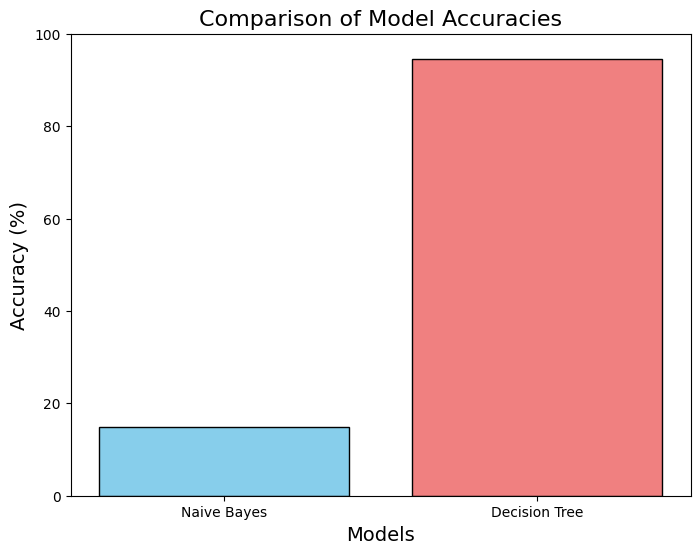

In [60]:
# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'], edgecolor='black')

# Add titles and labels
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0, 100)